In [29]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import exposure
import nibabel as nib
import nilearn.plotting as nip
from scipy.ndimage import convolve

plt.rcParams["figure.figsize"] = (12, 10)

In [17]:
def compare(img1, img2, titre='image convoluee'):
    plt.figure(figsize=(18, 12))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title("Image originale")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(titre)
    plt.axis("off")
    plt.show()

In [5]:
im = nib.load("/Users/noeedc/Documents/Stage2021/data_new/HIE_baby_021/MEDI_results/results_readme/iMag_corrected.nii")
im_data = im.get_fdata()

In [6]:
# Contrast stretching
p2, p98 = np.percentile(im_data, (2, 98))
im_rescale = exposure.rescale_intensity(im_data, in_range=(p2, p98))


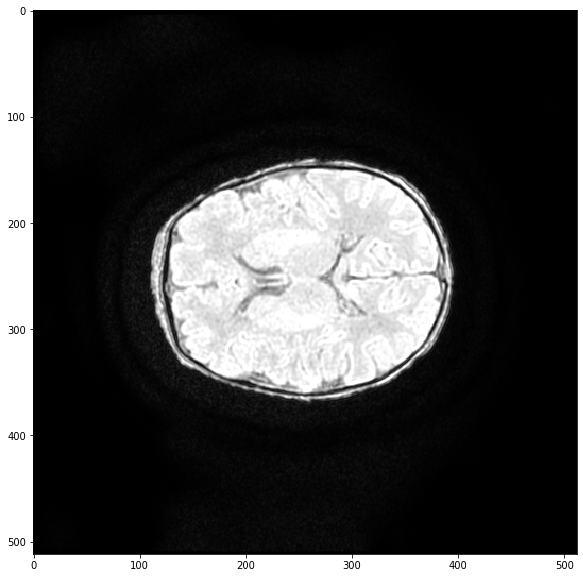

In [31]:
plt.imshow(im_rescale[:,:,40], cmap='gray')

In [8]:
new_nifti = nib.Nifti1Image(im_rescale, im.affine, im.header)
nib.save(new_nifti,"/Users/noeedc/Documents/Stage2021/data_new/HIE_baby_021/MEDI_results/results_readme/iMag_constrast.nii") 

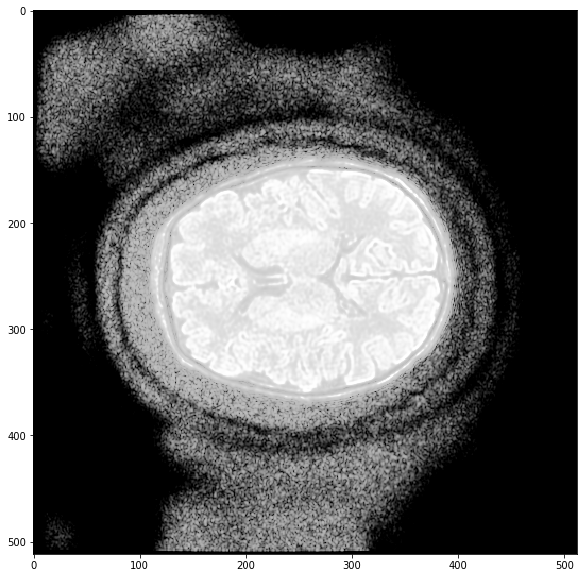

In [32]:
# Equalization
im_eq = exposure.equalize_hist(im_data)
plt.imshow(im_eq[:,:,40], cmap='gray')

In [10]:
min =  np.min(im_data)
max = np.max(im_data)
im_nor = (im_data - min)/(max- min)

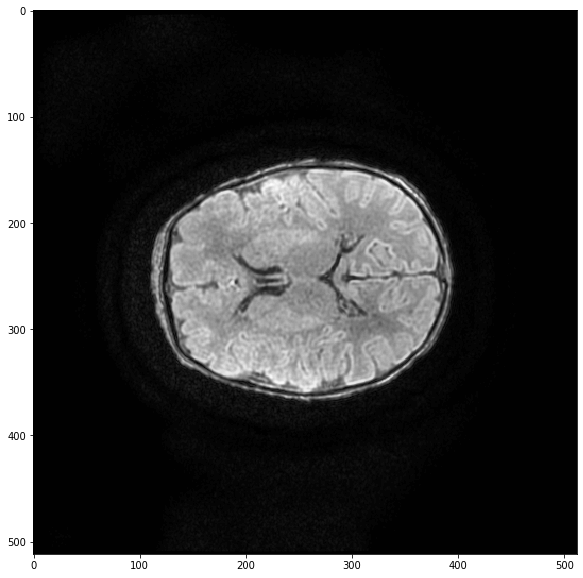

In [33]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(im_nor)
plt.imshow(img_adapteq[:,:,40], cmap='gray')

In [12]:
new_nifti = nib.Nifti1Image(img_adapteq, im.affine, im.header)
nib.save(new_nifti,"/Users/noeedc/Documents/Stage2021/data_new/HIE_baby_021/MEDI_results/results_readme/iMag_equali.nii") 

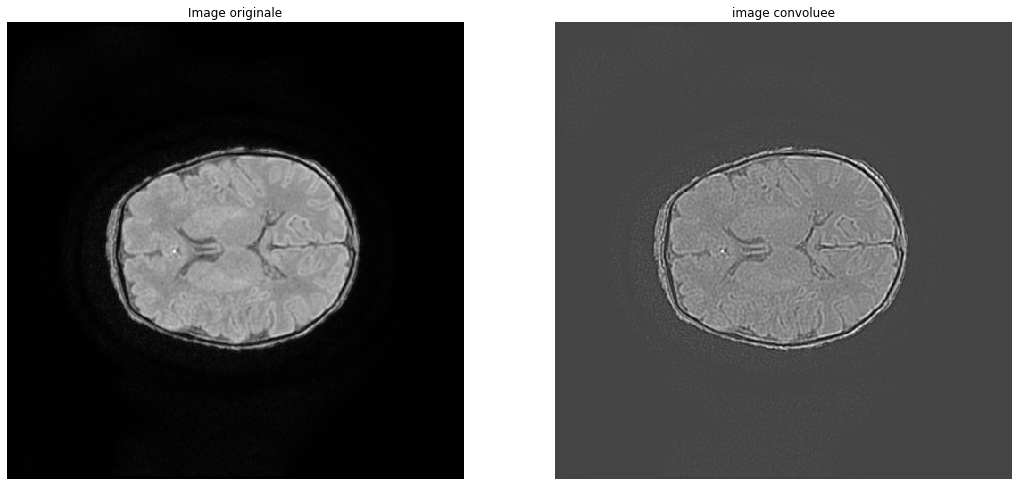

In [25]:
def high_boost(img, k):
    W_g = np.array([[1,2,1],[2,4,2],[1,2,1]]).astype(float)
    W_g = W_g/16
    Ig = convolve(img,W_g,mode='constant')

    W_L = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]).astype(float)
    return img+k*convolve(Ig,W_L,mode='constant')

im_higboost = high_boost(im_data[:,:,40],1)
compare(im_data[:,:,40], im_higboost)